# Chapter 6 Exercises #

Be sure to add titles, axis labels, and legends (where
needed) to the plots

1. Using seaborn, create a heatmap to visualize the correlation coefficients
between earthquake magnitude and whether there was a tsunami with the
magType of mb .

In [166]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
earthquakes = pd.read_csv('earthquakes.csv')
fb = pd.read_csv('fb_stock_prices_2018.csv', index_col = 'date', parse_dates = True)
earthquakes.head()

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California


In [167]:
type(earthquakes.query('magType == "mb"')['mag']) # series if [ ], dataframe if [[ ]]

pandas.core.series.Series

Text(0.5, 1.0, 'Correlation between earthquake magnitude and \n whether there was a tsunami with `mb` magtype')

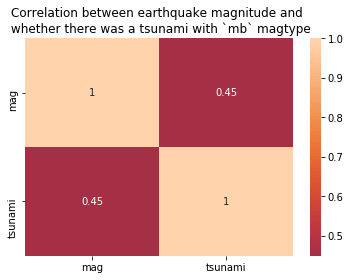

In [192]:
sns.heatmap(
    earthquakes.query('magType == "mb"')[['mag', 'tsunami']].corr(),
    annot=True, center=0)
plt.title('Correlation between earthquake magnitude and \n whether there was a tsunami with `mb` magtype')

2. Create a box plot of Facebook volume traded and closing prices, and draw
reference lines for the bounds of a Tukey fence with a multiplier of 1.5. The
bounds will be at Q1 - 1.5 * IQR and Q3 + 1.5 * IQR . Be sure to use
the quantile() method on the data to make this easier. (Pick whichever
orientation you prefer for the plot, but make sure to use subplots.)

In [169]:
subset = fb[['volume', 'close']]
type(subset)

pandas.core.frame.DataFrame

In [170]:
quantiles = subset.quantile([0.25, 0.75])
quantiles.loc['iqr',:] = quantiles.loc[0.75,:] - quantiles.loc[0.25,:] # add a row with "iqr" values
quantiles.loc['lower',:] = quantiles.loc[0.25,:] - 1.5 * quantiles.loc['iqr',:]
quantiles.loc['upper',:] = quantiles.loc[0.75,:] + 1.5 * quantiles.loc['iqr',:]
quantiles

,volume,close
0.25,17828394.0,157.9150
0.75,30313840.0,185.2700
iqr,12485446.0,27.3550
lower,-899775.0,116.8825
upper,49042009.0,226.3025


In [171]:
quantiles.loc['lower']

volume   -899775.0000
close        116.8825
Name: lower, dtype: float64

In [172]:
quantiles.loc['lower'].iloc[0]

-899775.0

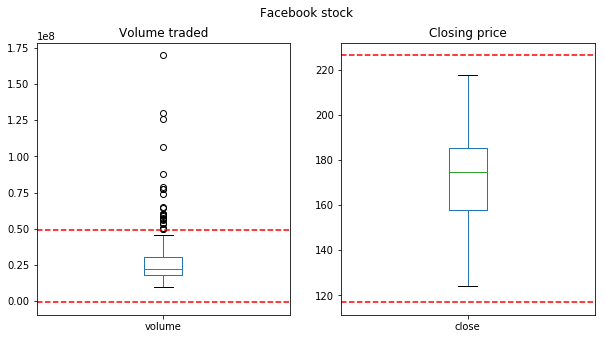

In [177]:
axes = subset.plot(kind = 'box', subplots = True, layout = (1,2), figsize = (10,5), title = ['Volume traded', 'Closing price'])
plt.suptitle('Facebook stock')
# following is a solution courtesy of John Peach
for j, lower, upper in zip(axes, quantiles.loc['lower'], quantiles.loc['upper']):
    j.axhline(y = lower, color = 'r', linestyle = '--')
    j.axhline(y = upper, color = 'r', linestyle = '--')

In [180]:
# learning moment provided by John Peach on how for iteration using for loop and zip works

In [183]:
i = range(5)
i

range(0, 5)

In [182]:
a = ['a', 'b', 'c', 'd', 'e']
for i, j in zip(range(5), a):
    print(str(i) + ' ' + j)

0 a
1 b
2 c
3 d
4 e


3. Fill in the area between the bounds in the plot from exercise #2.

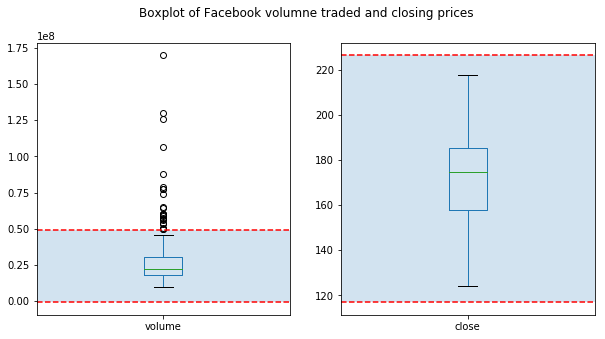

In [146]:
axes = subset.plot(kind = 'box', subplots = True, layout = (1,2), figsize = (10,5))
plt.suptitle('Boxplot of Facebook volumne traded and closing prices')
for j, lower, upper in zip(axes, quantiles.loc['lower'], quantiles.loc['upper']):
    j.axhline(y = lower, color = 'r', linestyle = '--')
    j.axhline(y = upper, color = 'r', linestyle = '--')
    j.axhspan(lower, upper, alpha = 0.2) # used axhspan instead of fill_between function

4. Use axvspan() to shade a rectangle from '2018-07-25' to
'2018-07-31' , which marks the large decline in Facebook price on a line
plot of the closing price.

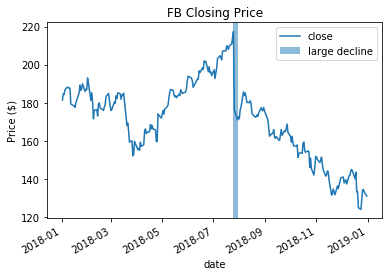

In [184]:
ax = fb.close.plot(title = 'FB Closing Price')
ax.axvspan('2018-07-25', '2018-07-31', alpha = 0.5, label = 'large decline')
plt.ylabel('Price ($)')
plt.legend()

5. Using the Facebook stock price data, annotate the following three events on
a line plot of the closing price:

    * Disappointing user growth announced after close on July 25, 2018

    * Cambridge Analytica story breaks on March 19, 2018 (when it affected the market)

    * FTC launches investigation on March 20, 2018

Text(0, 0.5, 'Price ($)')

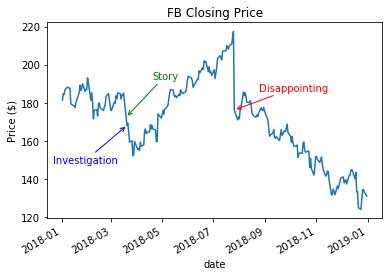

In [191]:
ax = fb.close.plot(title = 'FB Closing Price')
plt.annotate(
    'Disappointing',
    xy = ('2018-07-26', fb.close['2018-07-26']),
    xytext = ('2018-08-25', (fb.close['2018-07-26'] + 10)),
    color = 'red',
    arrowprops = {'arrowstyle' : '->', 'color': 'red'})
plt.annotate(
    'Story',
    xy = ('2018-03-19', fb.close['2018-03-19']),
    xytext = ('2018-04-19', (fb.close['2018-03-19'] + 20)),
    color = 'green',
    arrowprops = {'arrowstyle' : '->', 'color': 'green'})
plt.annotate(
    'Investigation',
    xy = ('2018-03-20', fb.close['2018-03-20']),
    xytext = ('2017-12-22', (fb.close['2018-03-20'] - 20)),
    color = 'blue',
    arrowprops = {'arrowstyle' : '->', 'color': 'blue'})
plt.ylabel('Price ($)')

6. Modify the reg_resid_plots() function to use a matplotlib colormap
instead of cycling between two colors. Remember, for this use case, we
should pick a qualitative colormap or make our own.

Meh.